In [1]:
from IPython.display import display, Image
import dataframe_image as dfi
import pandas as pd
import numpy as np
import time

In [2]:
from LagsCreator import LagsCreator

In [3]:
data = np.array([[np.nan, np.nan, 3, np.nan, np.nan, np.nan, np.nan, 8, np.nan, np.nan, np.nan, np.nan, 14, np.nan, np.nan, np.nan, np.nan, 19, np.nan, np.nan, np.nan, np.nan, 24, np.nan, np.nan, np.nan, np.nan, 29], 
                 [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 
                 [1, np.nan, np.nan, 4, np.nan, np.nan, 7, np.nan, np.nan, 11, np.nan, np.nan, 14, np.nan, np.nan, 17, np.nan, np.nan, 20, np.nan, np.nan, 23, np.nan, np.nan, 26, np.nan, np.nan, 29]])

In [4]:
df = pd.DataFrame(np.transpose(data), index = pd.date_range("2018-08-22", periods = data.shape[1]), columns = pd.MultiIndex.from_product([["Group 1"], ["Exchange rate", "FCG <= 2", "Rainfalls (mm)"]]))
df.index.name = "Datetime"

In [5]:
df["Group 1"]

,Exchange rate,FCG <= 2,Rainfalls (mm)
Datetime,,,
2018-08-22,NaN,1.0,1.0
2018-08-23,NaN,2.0,NaN
2018-08-24,3.0,3.0,NaN
2018-08-25,NaN,4.0,4.0
2018-08-26,NaN,5.0,NaN
2018-08-27,NaN,6.0,NaN
2018-08-28,NaN,7.0,7.0
2018-08-29,8.0,8.0,NaN
2018-08-30,NaN,10.0,NaN


In [6]:
lags_dict = dict()
# Define lags for each indicator.
lags_dict["Exchange rate"] = np.array([1, 2, 3])
lags_dict["FCG <= 2"] = np.array([1, 2, 3, 4, 5])
lags_dict["Rainfalls (mm)"] = np.array([1, 2, 3])

In [7]:
t1=time.time()
creator = LagsCreator(df["Group 1"], lags_dict, "FCG <= 2", delay = False) 
t2=time.time()
print(t2-t1)

0.021303892135620117


In [8]:
t1=time.time()
X_train, y_train, X_test, columns_input = creator.to_supervised(h = 1, step = 1, single_step = True, return_dataframe = True,
                                                                feature_time = ["Day", "Month", "Year"])
t2=time.time()
print(t2-t1)

0.012589693069458008


In [9]:
X_train

Features Exchange rate             FCG <= 2                            \
Lags            x(t-2) x(t-1) x(t)   x(t-4) x(t-3) x(t-2) x(t-1) x(t)   
0                    3      8   14       10     11     12     13   14   
1                    3      8   14       11     12     13     14   15   
2                    3      8   14       12     13     14     15   16   
3                    3      8   14       13     14     15     16   17   
4                    3      8   14       14     15     16     17   18   
5                    8     14   19       15     16     17     18   19   
6                    8     14   19       16     17     18     19   20   
7                    8     14   19       17     18     19     20   21   
8                    8     14   19       18     19     20     21   22   
9                    8     14   19       19     20     21     22   23   
10                  14     19   24       20     21     22     23   24   
11                  14     19   24       21     22     23     24   25   
12                  14     19   24       22     23     24     25   26   
13                  14     19   24       23     24     25     26   27   
14                  14     19   24       24     25     26     27   28   

Features Rainfalls (mm)                Day  Month   Year  
Lags             x(t-2) x(t-1) x(t) x(t+1) x(t+1) x(t+1)  
0                     7     11   14      4      9   2018  
1                     7     11   14      5      9   2018  
2                     7     11   14      6      9   2018  
3                    11     14   17      7      9   2018  
4                    11     14   17      8      9   2018  
5                    11     14   17      9      9   2018  
6                    14     17   20     10      9   2018  
7                    14     17   20     11      9   2018  
8                    14     17   20     12      9   2018  
9                    17     20   23     13      9   2018  
10                   17     20   23     14      9   2018  
11                   17     20   23     15      9   2018  
12                   20     23   26     16      9   2018  
13                   20     23   26     17      9   2018  
14                   20     23   26     18      9   2018

In [10]:
y_train

Target,FCG <= 2
Prediction horizon,x(t+1)
0,15
1,16
2,17
3,18
4,19
5,20
6,21
7,22
8,23


In [11]:
X_test

Features Exchange rate             FCG <= 2                            \
Lags            x(t-2) x(t-1) x(t)   x(t-4) x(t-3) x(t-2) x(t-1) x(t)   
0                   19     24   29       25     26     27     28   29   

Features Rainfalls (mm)                Day  Month   Year  
Lags             x(t-2) x(t-1) x(t) x(t+1) x(t+1) x(t+1)  
0                    23     26   29     19      9   2018

In [12]:
X_train.shape

(15, 14)

In [13]:
train, test = creator.visualization(boundaries = False, gif = True)

In [14]:
train[0]

,Exchange rate,FCG <= 2,Rainfalls (mm)
2018-08-22,nan,1.0,1.0
2018-08-23,nan,2.0,nan
2018-08-24,3.0,3.0,nan
2018-08-25,nan,4.0,4.0
2018-08-26,nan,5.0,nan
2018-08-27,nan,6.0,nan
2018-08-28,nan,7.0,7.0
2018-08-29,8.0,8.0,nan
2018-08-30,nan,10.0,nan
2018-08-31,nan,11.0,11.0


In [15]:
train[-1]

,Exchange rate,FCG <= 2,Rainfalls (mm)
2018-08-22,nan,1.0,1.0
2018-08-23,nan,2.0,nan
2018-08-24,3.0,3.0,nan
2018-08-25,nan,4.0,4.0
2018-08-26,nan,5.0,nan
2018-08-27,nan,6.0,nan
2018-08-28,nan,7.0,7.0
2018-08-29,8.0,8.0,nan
2018-08-30,nan,10.0,nan
2018-08-31,nan,11.0,11.0


In [16]:
test[0]

,Exchange rate,FCG <= 2,Rainfalls (mm)
2018-08-22,nan,1.0,1.0
2018-08-23,nan,2.0,nan
2018-08-24,3.0,3.0,nan
2018-08-25,nan,4.0,4.0
2018-08-26,nan,5.0,nan
2018-08-27,nan,6.0,nan
2018-08-28,nan,7.0,7.0
2018-08-29,8.0,8.0,nan
2018-08-30,nan,10.0,nan
2018-08-31,nan,11.0,11.0


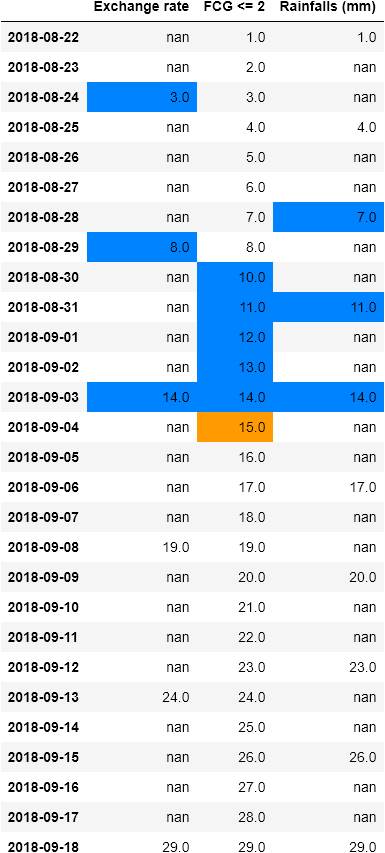

In [17]:
try:
    with open("./visualization/GIF.gif", "rb") as f:
        display(Image(data = f.read(), format = "png", width = 150))
except:
    pass